Cài đặt Thư Viện

Cài đặt các thư viện cần thiết:
transformers: Thư viện Hugging Face để tải mô hình và tokenizer.
datasets: Thư viện để tải và xử lý dataset.
torch: Thư viện PyTorch.
matplotlib, seaborn: Dùng để vẽ biểu đồ, nếu cần.

Tải Dữ Liệu

Sử dụng load_dataset("imdb") để tải bộ dữ liệu IMDB cho bài toán phân loại cảm xúc (Sentiment Analysis).

Khởi Tạo Mô Hình và Tokenizer

Tải mô hình Phobert Base (một mô hình tiếng Việt đã được huấn luyện trước) từ Hugging Face.
Tạo đối tượng AutoTokenizer cho việc chuyển đổi văn bản thành token.

Kiểm Tra Các Cột Trong Dữ Liệu

In ra các cột trong dataset để kiểm tra cấu trúc của dữ liệu.

Tokenize và Gán Nhãn

Hàm tokenize_and_label:
Tokenize văn bản (tách từ, padding, truncation).
Gán nhãn cho mỗi câu.
Áp dụng hàm tokenize_and_label cho dataset.

Xử Lý Dữ Liệu

Dữ liệu được làm sạch (loại bỏ HTML tags) bằng cách sử dụng hàm clean_text.
Tạo Dataloader

Sử dụng DataLoader của PyTorch để tạo các batch dữ liệu cho việc huấn luyện và đánh giá.
Tạo hàm collate_fn để xử lý dữ liệu trong mỗi batch (padding các chuỗi đầu vào).

Kiểm Tra Phần Cứng

Kiểm tra xem có GPU hay không và đặt mô hình lên đúng thiết bị (cuda hoặc cpu).
Khai Báo Optimizer

Sử dụng AdamW làm optimizer với learning rate là 5e-5.
Hàm Huấn Luyện (Train)

Hàm train sẽ thực hiện:
Tính toán loss cho mỗi batch.
Thực hiện backward pass và cập nhật tham số mô hình.
Hàm Đánh Giá (Evaluate)

Hàm evaluate sẽ:
Tính toán loss và accuracy cho tập dữ liệu kiểm tra (eval).
Huấn Luyện Mô Hình

Chạy vòng lặp huấn luyện trong epochs (3 epochs trong trường hợp này).
Sau mỗi epoch, in ra loss và accuracy cho dữ liệu huấn luyện và kiểm tra.
Lưu mô hình sau mỗi epoch.

Lưu Mô Hình

Sau khi huấn luyện hoàn thành, lưu mô hình và tokenizer cuối cùng.

Trình Tự Chạy

Cài đặt thư viện: Cài đặt các thư viện cần thiết.

Tải dataset: Dữ liệu IMDB được tải về.

Khởi tạo mô hình: Mô hình và tokenizer Phobert được tải về.

Tiền xử lý dữ liệu:

Tokenize và gán nhãn cho dữ liệu.

Làm sạch dữ liệu.

Tạo Dataloader: Batch hóa dữ liệu huấn luyện và kiểm tra.

Khởi tạo thiết bị: Kiểm tra GPU và chuyển mô hình lên GPU (nếu có).

Khởi tạo optimizer: Cấu hình AdamW optimizer.

Huấn luyện: Tiến hành huấn luyện mô hình qua các epoch.

Đánh giá: Sau mỗi epoch, đánh giá mô hình trên tập kiểm tra.

Lưu mô hình: Sau mỗi epoch và khi kết thúc, lưu mô hình.

In [ ]:
# Cài đặt thư viện cần thiết
!pip install transformers datasets accelerate
!pip install torch
!pip install matplotlib seaborn

In [2]:
from datasets import load_dataset
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW, AutoModelForMaskedLM
from torch.utils.data import DataLoader
import re
import numpy as np

from datasets import load_dataset

Mục đích sử dụng: Thư viện datasets của Hugging Face giúp tải và xử lý các bộ dữ liệu cho các mô hình học máy.

Tại sao dùng?: load_dataset là một phương thức mạnh mẽ để tải về các bộ dữ liệu phổ biến, bao gồm IMDB trong trường hợp này. Thư viện này giúp dễ dàng xử lý dữ liệu, từ việc chia tách tập huấn luyện và kiểm tra, đến việc áp dụng các phép biến đổi dữ liệu như tokenization.

2. import torch

Mục đích sử dụng: Thư viện PyTorch là một thư viện học sâu phổ biến cho việc xây dựng và huấn luyện các mô hình học máy.

Tại sao dùng?: PyTorch cung cấp các công cụ cần thiết để làm việc với tensor (ma trận đa chiều), xây dựng mô hình học sâu, và thực hiện các phép toán tối ưu (backpropagation, cập nhật tham số). Trong đoạn mã, PyTorch được sử dụng để xử lý dữ liệu, xây dựng mô hình và thực hiện huấn luyện mô hình (các hàm như DataLoader, AdamW, v.v.).

3. from transformers import AutoModelForSequenceClassification, AutoTokenizer, AdamW, AutoModelForMaskedLM

Mục đích sử dụng:

AutoModelForSequenceClassification: Tải mô hình tiền huấn luyện từ Hugging Face và sử dụng nó cho bài toán phân loại chuỗi (sequence classification), ví dụ như phân loại cảm xúc từ các câu văn.

AutoTokenizer: Tải tokenizer từ Hugging Face, được sử dụng để chuyển đổi các văn bản thành các token (các đơn vị ngữ nghĩa nhỏ hơn), giúp mô hình hiểu và xử lý văn bản đầu vào.

AdamW: Đây là một loại optimizer (trình tối ưu hóa) trong PyTorch, giúp tối ưu hóa các tham số của mô hình trong quá trình huấn luyện. AdamW là một phiên bản cải tiến của Adam với trọng số giảm (weight decay), giúp ngăn ngừa hiện tượng overfitting.

AutoModelForMaskedLM: Được sử dụng nếu bạn muốn làm việc với mô hình Masked Language Modeling (MLM), nhưng không cần trong trường hợp này vì bạn đang làm việc với mô hình phân loại chuỗi.

Tại sao dùng?:

AutoModelForSequenceClassification và AutoTokenizer là các công cụ để dễ dàng tải và áp dụng các mô hình đã được huấn luyện trước của Hugging Face, như Phobert (dành cho tiếng Việt), giúp giải quyết bài toán phân loại cảm xúc.

AdamW là optimizer phổ biến cho các mô hình học sâu, giúp cải thiện hiệu quả huấn luyện và giảm overfitting.

AutoModelForMaskedLM có thể không cần thiết trong trường hợp của bạn, vì bạn đang làm việc với mô hình phân loại.

4. from torch.utils.data import DataLoader

Mục đích sử dụng: DataLoader là một lớp trong PyTorch dùng để quản lý dữ liệu theo lô (batch), giúp dễ dàng tạo ra các batch dữ liệu để huấn luyện mô hình.

Tại sao dùng?: Trong huấn luyện mô hình học sâu, việc xử lý dữ liệu theo lô (batch processing) là rất quan trọng để tăng hiệu suất và giảm chi phí tính toán. DataLoader giúp tự động chia nhỏ tập dữ liệu thành các batch và tối ưu hóa các thao tác như trộn (shuffling) và pad dữ liệu (padding).

5. import re

Mục đích sử dụng: re là thư viện của Python để làm việc với biểu thức chính quy (regular expressions), giúp xử lý văn bản.

Tại sao dùng?: Thư viện này được sử dụng trong đoạn mã để làm sạch dữ liệu văn bản (loại bỏ HTML tags) trước khi đưa vào mô hình huấn luyện. Biểu thức chính quy giúp tìm kiếm và thay thế các phần tử trong văn bản một cách linh hoạt và hiệu quả.

6. import numpy as np

Mục đích sử dụng: numpy là thư viện mạnh mẽ của Python để làm việc với mảng đa chiều và các phép toán số học.

Tại sao dùng?: Trong đoạn mã, numpy có thể được sử dụng để xử lý và chuyển đổi các dữ liệu dưới dạng mảng hoặc để tính toán các phép toán như tính trung bình của loss hoặc accuracy. Mặc dù trong đoạn mã không có nhiều đoạn sử dụng trực tiếp numpy, nhưng nó có thể hữu ích khi làm việc với các phép toán số học.

In [3]:
dataset = load_dataset("imdb")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [4]:
# Sử dụng phobert-base thay cho mô hình lớn VÌ MÔ HÌNH LỚN THÌ NGẬP RAM
model_name = "vinai/phobert-base"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Việc sử dụng mô hình base giúp giảm yêu cầu về bộ nhớ, làm cho quá trình huấn luyện và triển khai mô hình ít tốn tài nguyên hơn. Mô hình base là phiên bản nhỏ hơn của mô hình large, nhưng vẫn có khả năng đạt được kết quả tốt trong nhiều tác vụ NLP.

AutoModelForSequenceClassification:

Đây là một lớp trong thư viện transformers của Hugging Face, được sử dụng để tải một mô hình đã huấn luyện trước và sử dụng nó cho bài toán phân loại chuỗi.
AutoModelForSequenceClassification sẽ tự động tải mô hình phù hợp với tác vụ phân loại chuỗi, tức là mô hình có thể phân loại các chuỗi văn bản vào các lớp khác nhau (ở đây là phân loại cảm xúc cho văn bản trong dataset IMDB).
Lý do dùng AutoModelForSequenceClassification: Đây là lớp tự động hóa giúp bạn dễ dàng tải mô hình phân loại mà không cần phải lo lắng về việc cấu hình mô hình, đảm bảo rằng mô hình được tải phù hợp với tác vụ phân loại (sequence classification).
.from_pretrained(model_name):

Phương thức from_pretrained được sử dụng để tải mô hình đã huấn luyện trước từ Hugging Face Model Hub.
Trong trường hợp này, mô hình vinai/phobert-base sẽ được tải xuống từ Hugging Face và có thể sử dụng ngay cho tác vụ phân loại chuỗi.
Lý do dùng .from_pretrained() là vì mô hình đã được huấn luyện trước với một lượng dữ liệu lớn (chẳng hạn như văn bản tiếng Việt), giúp mô hình có khả năng hiểu ngữ nghĩa của ngôn ngữ mà không cần phải huấn luyện lại từ đầu.

In [5]:
# Kiểm tra các cột trong dataset
print(dataset)

# Kiểm tra thông tin các cột của dataset
print(dataset['train'].column_names)  # Nếu dataset có phần 'train'

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})
['text', 'label']


In [6]:
# Áp dụng cho dữ liệu đầu vào
# Hàm tokenize và gán nhãn
 # quá trình tokenization (chuyển đổi văn bản thành các token) và gán nhãn cho tập dữ liệu đầu vào. Cụ thể, nó sẽ chuẩn bị dữ liệu cho việc huấn luyện mô hình phân loại cảm xúc, trong đó mỗi mẫu dữ liệu sẽ được token hóa và gán nhãn tương ứng.
def tokenize_and_label(examples):
    tokenized = tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=256,
        return_tensors="pt"     # Trả về tensor PyTorch
    )
    tokenized["labels"] = examples["label"]  # Thêm nhãn vào batch
    return tokenized

tokenized_dataset = dataset.map(tokenize_and_label, batched=True)


def tokenize_and_label(examples):


Hàm này sẽ thực hiện việc tokenization cho cột văn bản (text) trong dataset và gán nhãn cho mỗi mẫu trong batch.
tokenized = tokenizer(examples["text"], ...):

tokenizer là một đối tượng được tạo ra từ mô hình AutoTokenizer (trong trường hợp này là phobert-base).

examples["text"]: Truy cập cột text trong dataset, đây là phần dữ liệu văn bản mà bạn muốn token hóa.

padding="max_length": Đảm bảo rằng tất cả các chuỗi văn bản trong batch có độ dài bằng max_length. Nếu chuỗi văn bản ngắn hơn, nó sẽ được padding (thêm ký tự padding) đến độ dài này. Nếu chuỗi dài hơn max_length, nó sẽ bị truncation (cắt bỏ).

truncation=True: Cắt bỏ các chuỗi văn bản dài hơn chiều dài tối đa (được quy định là max_length=256).

max_length=256: Đặt độ dài tối đa của mỗi chuỗi văn bản sau khi padding/cutting là 256. Điều này có nghĩa là mỗi câu trong batch sẽ được điều chỉnh sao cho độ dài không vượt quá 256 token.

return_tensors="pt": Chỉ định rằng hàm tokenizer sẽ trả về kết quả dưới dạng tensor PyTorch (thay vì dưới dạng list hoặc numpy array).

Điều này là cần thiết vì mô hình trong PyTorch yêu cầu dữ liệu đầu vào dưới dạng tensor.

tokenized["labels"] = examples["label"]:

Sau khi tokenization, hàm này sẽ thêm thông tin nhãn (labels) từ cột label vào đối tượng tokenized. Cột label chứa các nhãn mục tiêu cho bài toán phân loại (ví dụ: cảm xúc tích cực, tiêu cực).

examples["label"] là nhãn của các mẫu dữ liệu trong dataset mà bạn đang sử dụng (có thể là các nhãn số như 0, 1 hoặc các nhãn cảm xúc như "positive", "negative").

Thông qua bước này, hàm đảm bảo rằng sau khi token hóa, mỗi mẫu sẽ có cả dữ liệu đầu vào (input) và nhãn (labels) đi kèm.

return tokenized:

Hàm sẽ trả về đối tượng tokenized, chứa các thông tin sau khi xử lý: tokenized input (văn bản đã được chuyển thành token) và labels (nhãn mục tiêu cho bài toán phân loại).

dataset.map(tokenize_and_label, batched=True):

dataset là đối tượng chứa tập dữ liệu mà bạn đã tải xuống từ Hugging Face (trong trường hợp này là dataset IMDB).

.map() là phương thức trong thư viện datasets của Hugging Face, dùng để áp dụng một hàm cho mỗi mẫu trong dataset.

tokenize_and_label là hàm đã được định nghĩa ở bước trên, sẽ được áp dụng cho mỗi mẫu trong dataset.

batched=True: Chỉ thị cho hàm .map() xử lý dữ liệu theo dạng batch, nghĩa là nhiều mẫu dữ liệu sẽ được xử lý một lần. Điều này giúp tăng hiệu suất trong quá trình xử lý, vì việc áp dụng tokenization và gán nhãn cho từng mẫu riêng lẻ có thể rất tốn thời gian.

Nếu batched=False, hàm tokenize_and_label sẽ được gọi cho từng mẫu đơn lẻ, còn nếu batched=True, examples sẽ là một batch chứa nhiều mẫu dữ liệu.

Kết quả là một dataset mới, trong đó mỗi mẫu sẽ có các trường input_ids, attention_mask, và labels được thêm vào (được trả về từ hàm tokenize_and_label).

In [7]:
print(set(tokenized_dataset['train']['label']))  # Kiểm tra nhãn trong dữ liệu huấn luyện

{0, 1}


In [8]:
def collate_fn(batch):
    # Tokenize và pad dữ liệu trong batch
    input_ids = [item['input_ids'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]

    # Pad tất cả input_ids và attention_mask về cùng độ dài
    input_ids = torch.nn.utils.rnn.pad_sequence([torch.tensor(ids) for ids in input_ids],
                                                batch_first=True,
                                                padding_value=1)
    attention_mask = torch.nn.utils.rnn.pad_sequence([torch.tensor(mask) for mask in attention_mask],
                                                     batch_first=True,
                                                     padding_value=0)

    # Gán labels nếu có
    labels = torch.tensor([item['labels'] for item in batch]) if 'labels' in batch[0] else None

    return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': labels}

train_dataloader = DataLoader(tokenized_dataset['train'], batch_size=8, collate_fn=collate_fn, shuffle=True)
eval_dataloader = DataLoader(tokenized_dataset['test'], batch_size=8, collate_fn=collate_fn, shuffle=False)

Thực hiện việc chuẩn bị dữ liệu đầu vào cho quá trình huấn luyện mô hình bằng cách sử dụng hàm collate_fn để xử lý các batch dữ liệu. Mục đích chính là đảm bảo rằng tất cả các mẫu trong một batch đều có kích thước đồng nhất (tức là độ dài của các chuỗi văn bản phải giống nhau). Cùng với đó, các nhãn (labels) cũng sẽ được xử lý phù hợp.


batch: Đây là một danh sách (list) các mẫu dữ liệu trong một batch. Mỗi mẫu dữ liệu trong batch là một từ điển chứa các trường như input_ids, attention_mask, và có thể là labels.

input_ids: Duyệt qua tất cả các mẫu trong batch và lấy giá trị của trường input_ids (là các token đã được mã hóa từ văn bản).

attention_mask: Tương tự, lấy giá trị của trường attention_mask, giúp mô hình nhận diện được token nào là padding (giá trị 0) và token nào là dữ liệu thực (giá trị 1).

torch.nn.utils.rnn.pad_sequence: Đây là một hàm trong PyTorch được dùng để padding các chuỗi dữ liệu (list của các tensor) để đảm bảo chúng có cùng độ dài. Cụ thể:

[torch.tensor(ids) for ids in input_ids]: Chuyển tất cả các danh sách input_ids thành tensor PyTorch.

batch_first=True: Đảm bảo rằng chiều đầu tiên của tensor là batch size, tức là dữ liệu sẽ có dạng (batch_size, sequence_length).

padding_value=1: Thiết lập giá trị padding là 1 cho các input_ids. Đây là giá trị của padding token mà model phobert-base sử dụng.

padding_value=0: Tương tự, thiết lập giá trị padding là 0 cho attention_mask (thường dùng 0 để biểu thị token padding).

Sau khi thực hiện padding, input_ids và attention_mask sẽ có cùng độ dài cho tất cả các mẫu trong batch.

labels: Trường labels chứa nhãn cho bài toán phân loại. Hàm này kiểm tra xem labels có tồn tại trong batch hay không (trong trường hợp nếu batch có chứa nhãn cho mỗi mẫu). Nếu có, nó sẽ chuyển đổi các nhãn thành một tensor PyTorch. Nếu không có labels (chẳng hạn, trong quá trình dự đoán hoặc không cần nhãn), giá trị của labels sẽ là None.

Cuối cùng, hàm trả về một dictionary chứa:

input_ids: Các tokenized input đã được padding.

attention_mask: Mặt nạ attention cho các token đã được padding.

labels: Các nhãn mục tiêu (nếu có).

DataLoader: Là một đối tượng trong PyTorch giúp chia tập dữ liệu thành các batch và cho phép truy xuất dữ liệu một cách hiệu quả trong quá trình huấn luyện và đánh giá.

tokenized_dataset['train']: Chỉ định dataset huấn luyện đã qua bước tokenization và gán nhãn.

batch_size=8: Mỗi batch sẽ có 8 mẫu dữ liệu.

collate_fn=collate_fn: Chỉ định hàm collate_fn đã định nghĩa ở trên để xử lý các batch dữ liệu (tokenization, padding, gán nhãn).

shuffle=True: Trong train_dataloader, dữ liệu sẽ được xáo trộn trước mỗi epoch để đảm bảo tính ngẫu nhiên trong quá trình huấn luyện.

shuffle=False: Trong eval_dataloader, dữ liệu sẽ không được xáo trộn vì trong quá trình đánh giá, thứ tự của dữ liệu không ảnh hưởng đến kết quả.


In [9]:
# Kiểm tra một số mẫu dữ liệu
print(tokenized_dataset['train']['text'][:5])  # Kiểm tra 5 mẫu đầu tiên của 'text'
print(tokenized_dataset['train']['label'][:5])  # Kiểm tra nhãn tương ứng

['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, e

In [10]:
# Hàm làm sạch văn bản (loại bỏ HTML tags)
def clean_text(text):
    # Loại bỏ HTML tags
    text = re.sub(r'<.*?>', '', text)
    return text

# Áp dụng hàm làm sạch cho dữ liệu
tokenized_dataset = tokenized_dataset.map(lambda x: {'text': [clean_text(t) for t in x['text']]}, batched=True)

tokenized_dataset.map(): để áp dụng một hàm (function) vào mỗi phần tử của dataset.

Phương thức này nhận một hàm (ở đây là lambda x: {...}) và áp dụng nó lên từng phần tử của dataset, sau đó trả về một dataset mới.

lambda x: {'text': [clean_text(t) for t in x['text']]}:

lambda: Đây là một hàm vô danh (anonymous function) được sử dụng để áp dụng vào mỗi phần tử của dataset. Trong trường hợp này, x đại diện cho mỗi phần tử trong dataset.

x['text']: Dữ liệu đầu vào x là một dictionary, và x['text'] là danh sách các văn bản (hoặc các đoạn văn bản) mà bạn muốn làm sạch.

[clean_text(t) for t in x['text']]: Đây là một list comprehension (lặp qua tất cả các văn bản trong x['text'] và áp dụng hàm clean_text() vào từng văn bản t).

clean_text(t): Hàm clean_text là một hàm được định nghĩa trước đó trong code (có nhiệm vụ làm sạch văn bản, chẳng hạn như loại bỏ các thẻ HTML). Bạn có thể hiểu rằng hàm này sẽ xử lý các văn bản trong x['text'] để loại bỏ những phần không cần thiết (như HTML tags).

batched=True:

Tham số batched=True có nghĩa là hàm sẽ được áp dụng trên toàn bộ một batch của dataset cùng một lúc thay vì áp dụng cho từng phần tử đơn lẻ.
Điều này giúp tối ưu hóa quá trình xử lý khi dataset có kích thước lớn.

Kết quả:

Sau khi thực thi, dataset tokenized_dataset sẽ có trường text đã được làm sạch, tức là các văn bản trong trường text sẽ không còn các thẻ HTML hoặc bất kỳ phần tử không mong muốn nào khác mà hàm clean_text() đã loại bỏ.

In [11]:
print(tokenized_dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 50000
    })
})


In [12]:
# Kiểm tra device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Khai báo optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


AdamW là một thuật toán tối ưu hóa (optimizer) cải tiến từ Adam.

Adam (Adaptive Moment Estimation) là một trong những thuật toán tối ưu hóa phổ biến trong học sâu, kết hợp giữa lợi ích của Momentum (điều chỉnh tốc độ học theo các gradient trước đó) và RMSProp (giảm thiểu vấn đề vanishing gradient) để điều chỉnh learning rate cho mỗi tham số riêng biệt.

AdamW là một cải tiến của Adam, với sự điều chỉnh weight decay (hệ số giảm trọng số), giúp giảm overfitting trong huấn luyện. Trên thực tế, AdamW thường hoạt động tốt hơn Adam trong các mô hình học sâu hiện đại, đặc biệt là với các mô hình lớn như transformers.

model.parameters(): Đây là cách bạn lấy tất cả các tham số (parameters) của mô hình. Những tham số này là trọng số và độ dốc trong các lớp của mô hình mà optimizer sẽ tối ưu hóa trong quá trình huấn luyện.

Khi bạn khởi tạo mô hình (ở đây là AutoModelForSequenceClassification), mô hình có nhiều lớp (layers) với các tham số như trọng số (weights) và độ dốc (biases). model.parameters() trả về một generator chứa tất cả các tham số này.

Tham số này sẽ được cập nhật trong mỗi bước huấn luyện khi optimizer chạy.

lr (learning rate): Là tham số quan trọng trong quá trình huấn luyện. Nó kiểm soát tốc độ mà optimizer điều chỉnh các tham số của mô hình trong mỗi bước.

5e-5 tương đương với 0.00005. Đây là một giá trị phổ biến trong huấn luyện các mô hình transformer như BERT hoặc PhoBERT.

Việc chọn learning rate phù hợp rất quan trọng, vì nếu quá cao, mô hình có thể không hội tụ được (overshoot), còn nếu quá thấp, mô hình có thể hội tụ quá chậm và không hiệu quả.

AdamW khác Adam ở cách nó áp dụng weight decay. Trong Adam, weight decay được thêm vào vào phần tính toán gradient, điều này có thể làm giảm hiệu quả tối ưu hóa. AdamW giải quyết vấn đề này bằng cách tách biệt weight decay và quá trình tối ưu hóa, làm cho quá trình huấn luyện ổn định hơn và mô hình ít bị overfitting hơn.

In [13]:
def train(model, dataloader, optimizer, device):
    model.train()
    total_loss = 0

    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        # Kiểm tra nếu labels tồn tại
        if "labels" in batch and batch["labels"] is not None:
            labels = batch["labels"].to(device)
        else:
            labels = None

        optimizer.zero_grad()

        # Forward pass
        if labels is not None:
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
        else:
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = torch.tensor(0.0)  # Loss bằng 0 nếu không có labels

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)

sử dụng PyTorch và Hugging Face Transformers. Hàm này sẽ thực hiện quá trình huấn luyện cho một epoch (hoặc vòng lặp huấn luyện) trên dữ liệu được cung cấp qua dataloader

model.train(): Chuyển mô hình vào chế độ huấn luyện (training mode). Điều này rất quan trọng trong các mô hình học sâu vì một số lớp (như Dropout và BatchNorm) hoạt động khác nhau trong chế độ huấn luyện và chế độ đánh giá. Khi bạn huấn luyện mô hình, bạn cần đảm bảo rằng mô hình đang ở trong chế độ huấn luyện để các lớp này hoạt động đúng.

total_loss = 0: Khởi tạo một biến total_loss để lưu tổng mất mát (loss) trong quá trình huấn luyện, sẽ được dùng để tính toán mất mát trung bình sau khi huấn luyện xong.

for batch in dataloader:: Lặp qua từng batch trong dataloader. Dataloader chia dataset thành các batch nhỏ hơn để có thể xử lý song song và tránh tràn bộ nhớ (out-of-memory).

input_ids = batch["input_ids"].to(device): Lấy input_ids từ batch và chuyển nó tới thiết bị (CPU hoặc GPU). input_ids là các token đã được mã hóa từ văn bản ban đầu.

attention_mask = batch["attention_mask"].to(device): Lấy attention_mask từ batch và chuyển nó tới thiết bị. Attention mask là một tensor có giá trị 1 cho các token không phải padding và 0 cho các token padding.

if "labels" in batch and batch["labels"] is not None:: Kiểm tra xem batch có chứa trường labels không và labels có giá trị hợp lệ hay không. Trong các bài toán phân loại, labels là nhãn cho các mẫu trong batch.

labels = batch["labels"].to(device): Nếu có labels, chuyển chúng tới thiết bị (CPU hoặc GPU) để sử dụng trong quá trình huấn luyện.

else: labels = None: Nếu không có labels, tức là có thể là một bước kiểm tra hoặc huấn luyện không có nhãn (chẳng hạn như trong các bài toán học không giám sát hoặc mô hình bị lỗi).

optimizer.zero_grad(): Reset gradients của mô hình trước khi thực hiện một bước tối ưu hóa mới. Khi bạn sử dụng backward() để tính toán gradients, chúng sẽ được cộng dồn vào nhau. Lệnh này giúp tránh việc cộng dồn gradients từ các lần huấn luyện trước đó, khiến mô hình học sai.

if labels is not None:: Nếu có labels (nghĩa là đây là một bài toán có giám sát), thực hiện forward pass qua mô hình và tính toán mất mát (loss) dựa trên kết quả mô hình và các nhãn thật.

outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels): Gọi mô hình với input_ids, attention_mask, và labels. Hàm model() sẽ trả về một đối tượng chứa nhiều giá trị, trong đó có loss (mất mát) nếu bạn cung cấp nhãn.

loss = outputs.loss: Lấy giá trị mất mát từ kết quả của mô hình.

else:: Nếu không có labels, có thể là trường hợp huấn luyện không giám sát hoặc chỉ kiểm tra mô hình mà không cần tính toán mất mát.

loss = torch.tensor(0.0): Nếu không có nhãn, loss được gán giá trị bằng 0 (chỉ cần thực hiện forward pass mà không cần tính loss).

loss.backward(): Tính toán gradients (đạo hàm) của mất mát đối với các tham số của mô hình.

optimizer.step(): Cập nhật các tham số của mô hình dựa trên gradients đã tính toán và learning rate của optimizer. Đây là bước thực sự "học" của mô hình, giúp các tham số của mô hình điều chỉnh sao cho loss được giảm thiểu.

total_loss += loss.item(): Cộng dồn giá trị mất mát (loss) vào biến total_loss để tính tổng mất mát trong toàn bộ batch. .item() giúp chuyển tensor thành giá trị scalar (số thực) để dễ dàng xử lý.

return total_loss / len(dataloader): Tính mất mát trung bình cho toàn bộ dữ liệu huấn luyện trong một epoch bằng cách chia tổng mất mát cho số batch trong dataloader. Giá trị này sẽ cho biết mức độ lỗi của mô hình sau khi hoàn thành quá trình huấn luyện trong một epoch.

In [14]:
def evaluate(model, eval_dataloader, device):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            # Kiểm tra nếu labels tồn tại
            if 'labels' in batch and batch['labels'] is not None:
                labels = batch['labels'].to(device)
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                logits = outputs.logits

                total_loss += loss.item()

                # Tính độ chính xác
                predictions = torch.argmax(logits, dim=-1)
                correct_predictions += (predictions == labels).sum().item()
                total_predictions += labels.size(0)
            else:
                # Nếu không có labels, chỉ tính logits mà không tính loss
                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                logits = outputs.logits

    avg_loss = total_loss / len(eval_dataloader) if total_loss > 0 else 0
    accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
    return avg_loss, accuracy

định nghĩa hàm evaluate() để đánh giá mô hình sau khi huấn luyện. Hàm này sẽ tính toán mất mát (loss) và độ chính xác (accuracy) trên tập dữ liệu đánh giá (validation/test set)

model.eval(): Đặt mô hình vào chế độ đánh giá (evaluation mode). Điều này rất quan trọng vì trong chế độ này, các lớp như Dropout và BatchNorm sẽ hành động khác so với trong chế độ huấn luyện. Khi đánh giá mô hình, chúng ta không cần các hoạt động ngẫu nhiên như trong huấn luyện, và mô hình sẽ sử dụng toàn bộ thông tin có sẵn để đưa ra dự đoán.

total_loss = 0: Khởi tạo biến total_loss để lưu tổng mất mát trong quá trình đánh giá. Mất mát này sẽ được tính toán cho mỗi batch và cộng dồn lại.

correct_predictions = 0: Biến này lưu số lượng dự đoán chính xác (số lượng mẫu mà mô hình dự đoán đúng nhãn).

total_predictions = 0: Biến này lưu tổng số dự đoán đã thực hiện (tức là số lượng mẫu trong tập đánh giá).

with torch.no_grad(): Dòng lệnh này giúp tắt tính toán gradients trong quá trình đánh giá. Vì trong quá trình đánh giá chúng ta không cần tính gradients (chỉ cần dự đoán và tính loss), việc này giúp tiết kiệm bộ nhớ và tăng tốc quá trình tính toán.

for batch in eval_dataloader:: Lặp qua từng batch trong eval_dataloader (dataloader cho dữ liệu kiểm tra/đánh giá).

input_ids = batch['input_ids'].to(device): Chuyển input_ids từ batch (các token đã được mã hóa) đến thiết bị (CPU hoặc GPU).

attention_mask = batch['attention_mask'].to(device): Chuyển attention_mask từ batch (chỉ số cho biết đâu là padding và đâu là dữ liệu thực) đến thiết bị.

if 'labels' in batch and batch['labels'] is not None:: Kiểm tra xem batch có chứa nhãn (labels) hay không và nhãn có giá trị hợp lệ không. Nếu có nhãn, chúng ta sẽ tính toán loss và độ chính xác.

labels = batch['labels'].to(device): Chuyển nhãn từ batch đến thiết bị (CPU hoặc GPU).

outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels): Gọi mô hình với input_ids, attention_mask, và labels để tính toán loss và logits (đầu ra của mô hình trước khi áp dụng softmax).

loss = outputs.loss: Lấy giá trị mất mát (loss) từ kết quả trả về của mô hình.

logits = outputs.logits: Lấy logits từ kết quả trả về của mô hình. Logits là đầu ra chưa qua hàm kích hoạt như softmax, dùng để tính xác suất của mỗi lớp.

total_loss += loss.item(): Cộng dồn giá trị loss của batch vào biến total_loss. loss.item() trả về giá trị scalar của tensor loss.

Tính độ chính xác:

predictions = torch.argmax(logits, dim=-1): Lấy chỉ số của lớp có xác suất cao nhất từ logits (các giá trị chưa qua hàm softmax). argmax() trả về chỉ số của phần tử có giá trị lớn nhất trong tensor, chính là lớp dự đoán của mô hình.

correct_predictions += (predictions == labels).sum().item(): So sánh các dự đoán với nhãn thực tế. Nếu dự đoán đúng, tăng biến correct_predictions lên 1 cho mỗi trường hợp đúng.

total_predictions += labels.size(0): Cộng số lượng mẫu trong batch vào total_predictions, giúp theo dõi tổng số mẫu được đánh giá.

Nếu không có labels (chẳng hạn trong trường hợp kiểm tra mô hình mà không cần tính loss), chỉ tính toán logits mà không tính loss.

outputs = model(input_ids=input_ids, attention_mask=attention_mask): Gọi mô hình chỉ với input_ids và attention_mask (không có nhãn).

avg_loss = total_loss / len(eval_dataloader) if total_loss > 0 else 0: Tính toán mất mát trung bình bằng cách chia tổng mất mát cho số batch trong eval_dataloader. Nếu không có mất mát (trong trường hợp không có nhãn), giá trị mất mát trung bình sẽ là 0.

accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0: Tính độ chính xác (accuracy) bằng cách chia số dự đoán đúng cho tổng số dự đoán và nhân với 100 để ra tỷ lệ phần trăm. Nếu không có dự đoán nào (trong trường hợp không có mẫu trong tập đánh giá), độ chính xác sẽ là 0%.

Hàm trả về mất mát trung bình và độ chính xác của mô hình trên tập dữ liệu đánh giá. Đây là các chỉ số quan trọng để đánh giá hiệu suất của mô hình.

In [15]:
print(next(iter(train_dataloader)))

{'input_ids': tensor([[    0,  1555,  1236,  ..., 42351,  3240,     2],
        [    0, 36182,  2573,  ..., 15945,  7269,     2],
        [    0,   870,  7873,  ...,     1,     1,     1],
        ...,
        [    0, 24846,     4,  ...,  6688,     5,     2],
        [    0,  1555, 19029,  ...,  1395, 15654,     2],
        [    0,  1555, 15198,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([0, 1, 0, 0, 0, 0, 1, 0])}


In [16]:
for batch in train_dataloader:
    print("Input IDs shape:", batch['input_ids'].shape)  # (batch_size, 512)
    print("Attention Mask shape:", batch['attention_mask'].shape)
    print("Labels:", batch['labels'])
    break


Input IDs shape: torch.Size([8, 256])
Attention Mask shape: torch.Size([8, 256])
Labels: tensor([1, 1, 0, 1, 0, 0, 1, 1])


In [17]:
# Huấn luyện mô hình
epochs = 3

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    # Train
    train_loss = train(model, train_dataloader, optimizer, device)
    print(f"Train Loss: {train_loss:.4f}")

    # Evaluate
    eval_loss, eval_accuracy = evaluate(model, eval_dataloader, device)
    print(f"Eval Loss: {eval_loss:.4f}")
    print(f"Eval Accuracy: {eval_accuracy:.2f}%")

    # Optionally, save the model after every epoch
    model.save_pretrained(f'./phobert_sentiment_model_epoch_{epoch+1}')
    tokenizer.save_pretrained(f'./phobert_sentiment_model_epoch_{epoch+1}')

# Lưu mô hình sau khi hoàn thành tất cả các epoch
model.save_pretrained('./phobert_sentiment_model_final')
tokenizer.save_pretrained('./phobert_sentiment_model_final')


Epoch 1/3
Train Loss: 0.7000
Eval Loss: 0.6934
Eval Accuracy: 50.00%

Epoch 2/3
Train Loss: 0.6962
Eval Loss: 0.6933
Eval Accuracy: 50.00%

Epoch 3/3
Train Loss: 0.6953
Eval Loss: 0.6937
Eval Accuracy: 50.00%


('./phobert_sentiment_model_final/tokenizer_config.json',
 './phobert_sentiment_model_final/special_tokens_map.json',
 './phobert_sentiment_model_final/vocab.txt',
 './phobert_sentiment_model_final/bpe.codes',
 './phobert_sentiment_model_final/added_tokens.json')

Train Loss (train_loss)

Định nghĩa: train_loss là giá trị mất mát (loss) được tính trong quá trình huấn luyện (training phase).

Cách tính: Trong quá trình huấn luyện, mô hình sẽ cố gắng giảm thiểu giá trị loss bằng cách điều chỉnh các trọng số (weights) của nó. Mất mát là một chỉ số đo lường mức độ sai lệch giữa dự đoán của mô hình và nhãn thực tế.

Ý nghĩa: train_loss cho biết mô hình đang học như thế nào trong suốt quá trình huấn luyện. Một giá trị mất mát thấp cho thấy mô hình đã học tốt và dự đoán gần với nhãn thực tế.

Ví dụ: Nếu train_loss bằng 0.25, điều này có nghĩa là mô hình đang tạo ra dự đoán chỉ sai lệch một chút so với nhãn thực tế, và quá trình huấn luyện đang tiến triển tốt.

2. Eval Loss (eval_loss)

Định nghĩa: eval_loss là giá trị mất mát (loss) được tính trong quá trình đánh giá (evaluation phase), khi mô hình đã được huấn luyện xong và bạn muốn đo lường hiệu suất của nó trên dữ liệu chưa từng thấy trước đó (dữ liệu kiểm tra).

Cách tính: Tương tự như train_loss, eval_loss được tính trên tập dữ liệu đánh giá (validation/test set) mà mô hình chưa được huấn luyện. Tuy nhiên, trong giai đoạn này, các trọng số của mô hình không thay đổi, mà chỉ đơn giản là đo lường sự sai lệch giữa dự đoán và nhãn thực tế.

Ý nghĩa: eval_loss giúp bạn kiểm tra xem mô hình có học tốt không, và liệu mô hình có bị overfitting (học quá khớp với dữ liệu huấn luyện) hay không. Nếu eval_loss cao mà train_loss thấp, có thể mô hình đã overfit.

Ví dụ: Nếu eval_loss = 0.4, điều này có thể cho thấy mô hình vẫn có một mức độ sai lệch nhất định khi áp dụng trên dữ liệu mới. Mục tiêu là làm giảm eval_loss qua các vòng huấn luyện.

3. Eval Accuracy (eval_accuracy)

Định nghĩa: eval_accuracy là tỷ lệ chính xác (accuracy) trên tập dữ liệu đánh giá (test/validation set).

Cách tính: Accuracy được tính bằng cách chia số lượng dự đoán đúng cho tổng số mẫu trong tập dữ liệu đánh giá.


Ý nghĩa: Độ chính xác (accuracy) là một trong những chỉ số quan trọng nhất để đánh giá mô hình phân loại. Nó cho biết tỷ lệ phần trăm của các dự đoán đúng so với tổng số dự đoán. Mô hình có độ chính xác cao có nghĩa là nó phân loại chính xác nhiều mẫu hơn.

Ví dụ: Nếu eval_accuracy = 92.5%, có nghĩa là mô hình đã phân loại đúng 92.5% số lượng mẫu trong tập kiểm tra.

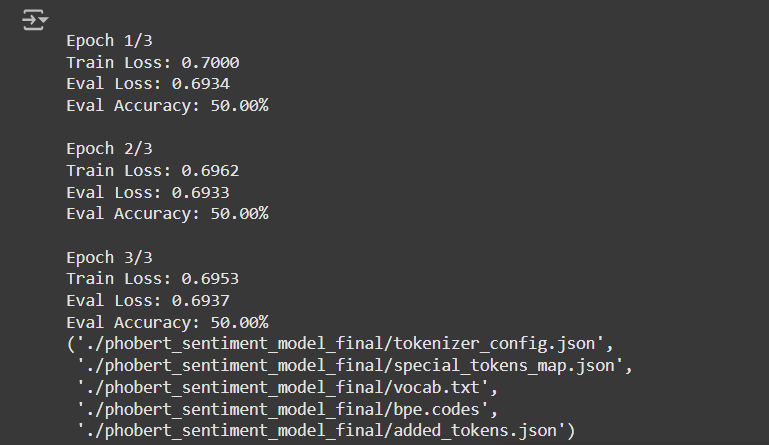

In [27]:
from transformers import BertForSequenceClassification
from transformers import BertTokenizer

In [29]:
# Sử dụng vnbert-base-uncased thay cho mô hình lớn VÌ MÔ HÌNH LỚN THÌ NGẬP RAM
model_name1 = "trituenhantaoio/bert-base-vietnamese-uncased"
model1 = AutoModelForSequenceClassification.from_pretrained(model_name1)
tokenizer1 = AutoTokenizer.from_pretrained(model_name1)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at trituenhantaoio/bert-base-vietnamese-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
# Áp dụng cho dữ liệu đầu vào
# Hàm tokenize và gán nhãn cho mô hình vnbert
def tokenize_and_label_vnbert(examples):
    tokenized = tokenizer1(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=256,
        return_tensors="pt"     # Trả về tensor PyTorch
    )
    tokenized["labels"] = examples["label"]  # Thêm nhãn vào batch
    return tokenized

tokenized_dataset1 = dataset.map(tokenize_and_label_vnbert, batched=True)

print(set(tokenized_dataset1['train']['label']))  # Kiểm tra nhãn trong dữ liệu huấn luyện

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

{0, 1}


In [31]:
def collate_fn_vnbert(batch):
    # Tokenize và pad dữ liệu trong batch
    input_ids = [item['input_ids'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]

    # Pad tất cả input_ids và attention_mask về cùng độ dài
    input_ids = torch.nn.utils.rnn.pad_sequence([torch.tensor(ids) for ids in input_ids],
                                                batch_first=True,
                                                padding_value=1)
    attention_mask = torch.nn.utils.rnn.pad_sequence([torch.tensor(mask) for mask in attention_mask],
                                                     batch_first=True,
                                                     padding_value=0)

    # Gán labels nếu có
    labels = torch.tensor([item['labels'] for item in batch]) if 'labels' in batch[0] else None

    return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': labels}

train_dataloader1 = DataLoader(tokenized_dataset1['train'], batch_size=8, collate_fn=collate_fn_vnbert, shuffle=True)
eval_dataloader1 = DataLoader(tokenized_dataset1['test'], batch_size=8, collate_fn=collate_fn_vnbert, shuffle=False)

In [32]:
# Kiểm tra một số mẫu dữ liệu
print(tokenized_dataset1['train']['text'][:5])  # Kiểm tra 5 mẫu đầu tiên của 'text'
print(tokenized_dataset1['train']['label'][:5])  # Kiểm tra nhãn tương ứng

['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, e

In [33]:
# Hàm làm sạch văn bản (loại bỏ HTML tags)
def clean_text_vnbert(text):
    # Loại bỏ HTML tags
    text = re.sub(r'<.*?>', '', text)
    return text

# Áp dụng hàm làm sạch cho dữ liệu
tokenized_dataset1 = tokenized_dataset1.map(lambda x: {'text': [clean_text_vnbert(t) for t in x['text']]}, batched=True)

print(tokenized_dataset1)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 50000
    })
})


In [34]:
# Kiểm tra device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1.to(device)

# Khai báo optimizer cho vnbert
optimizer1 = AdamW(model1.parameters(), lr=5e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [35]:
def train_vnbert(model1, dataloader, optimizer1, device):
    model1.train()
    total_loss = 0

    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        # Kiểm tra nếu labels tồn tại
        if "labels" in batch and batch["labels"] is not None:
            labels = batch["labels"].to(device)
        else:
            labels = None

        optimizer1.zero_grad()

        # Forward pass
        if labels is not None:
            outputs = model1(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
        else:
            outputs = model1(input_ids=input_ids, attention_mask=attention_mask)
            loss = torch.tensor(0.0)  # Loss bằng 0 nếu không có labels

        loss.backward()
        optimizer1.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)

In [36]:
def evaluate_vnbert(model1, eval_dataloader, device):
    model1.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            # Kiểm tra nếu labels tồn tại
            if 'labels' in batch and batch['labels'] is not None:
                labels = batch['labels'].to(device)
                outputs = model1(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                logits = outputs.logits

                total_loss += loss.item()

                # Tính độ chính xác
                predictions = torch.argmax(logits, dim=-1)
                correct_predictions += (predictions == labels).sum().item()
                total_predictions += labels.size(0)
            else:
                # Nếu không có labels, chỉ tính logits mà không tính loss
                outputs = model1(input_ids=input_ids, attention_mask=attention_mask)
                logits = outputs.logits

    avg_loss = total_loss / len(eval_dataloader) if total_loss > 0 else 0
    accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
    return avg_loss, accuracy

In [37]:
# Huấn luyện mô hình vnbert
epochs = 3

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    # Train
    train_loss = train_vnbert(model1, train_dataloader1, optimizer1, device)
    print(f"Train Loss: {train_loss:.4f}")

    # Evaluate
    eval_loss, eval_accuracy = evaluate_vnbert(model1, eval_dataloader1, device)
    print(f"Eval Loss: {eval_loss:.4f}")
    print(f"Eval Accuracy: {eval_accuracy:.2f}%")

    # Optionally, save the model after every epoch
    model1.save_pretrained(f'./vnbert_sentiment_model_epoch_{epoch+1}')
    tokenizer1.save_pretrained(f'./vnbert_sentiment_model_epoch_{epoch+1}')

# Lưu mô hình sau khi hoàn thành tất cả các epoch
model1.save_pretrained('./vnbert_sentiment_model_final')
tokenizer1.save_pretrained('./vnbert_sentiment_model_final')


Epoch 1/3
Train Loss: 0.7057
Eval Loss: 0.6941
Eval Accuracy: 50.00%

Epoch 2/3
Train Loss: 0.7023
Eval Loss: 0.6932
Eval Accuracy: 50.00%

Epoch 3/3
Train Loss: 0.7012
Eval Loss: 0.7022
Eval Accuracy: 50.00%


('./vnbert_sentiment_model_final/tokenizer_config.json',
 './vnbert_sentiment_model_final/special_tokens_map.json',
 './vnbert_sentiment_model_final/vocab.txt',
 './vnbert_sentiment_model_final/added_tokens.json',
 './vnbert_sentiment_model_final/tokenizer.json')

In [40]:
# Sử dụng fptai-base-cased thay cho mô hình khác
model_name2 = "FPTAI/vibert-base-cased"
model2 = AutoModelForSequenceClassification.from_pretrained(model_name2)
tokenizer2 = AutoTokenizer.from_pretrained(model_name2)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/581M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at FPTAI/vibert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


vocab.txt:   0%|          | 0.00/255k [00:00<?, ?B/s]

In [41]:
# Kiểm tra các cột trong dataset
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})


In [42]:
# Áp dụng cho dữ liệu đầu vào
# Hàm tokenize và gán nhãn cho mô hình fptai
def tokenize_and_label_fptai(examples):
    tokenized = tokenizer2(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=256,
        return_tensors="pt"     # Trả về tensor PyTorch
    )
    tokenized["labels"] = examples["label"]  # Thêm nhãn vào batch
    return tokenized

tokenized_dataset2 = dataset.map(tokenize_and_label_fptai, batched=True)

print(set(tokenized_dataset2['train']['label']))  # Kiểm tra nhãn trong dữ liệu huấn luyện

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

{0, 1}


In [43]:
def collate_fn_fptai(batch):
    # Tokenize và pad dữ liệu trong batch
    input_ids = [item['input_ids'] for item in batch]
    attention_mask = [item['attention_mask'] for item in batch]

    # Pad tất cả input_ids và attention_mask về cùng độ dài
    input_ids = torch.nn.utils.rnn.pad_sequence([torch.tensor(ids) for ids in input_ids],
                                                batch_first=True,
                                                padding_value=1)
    attention_mask = torch.nn.utils.rnn.pad_sequence([torch.tensor(mask) for mask in attention_mask],
                                                     batch_first=True,
                                                     padding_value=0)

    # Gán labels nếu có
    labels = torch.tensor([item['labels'] for item in batch]) if 'labels' in batch[0] else None

    return {'input_ids': input_ids, 'attention_mask': attention_mask, 'labels': labels}

train_dataloader2 = DataLoader(tokenized_dataset2['train'], batch_size=8, collate_fn=collate_fn_fptai, shuffle=True)
eval_dataloader2 = DataLoader(tokenized_dataset2['test'], batch_size=8, collate_fn=collate_fn_fptai, shuffle=False)

In [44]:
# Kiểm tra một số mẫu dữ liệu
print(tokenized_dataset2['train']['text'][:5])  # Kiểm tra 5 mẫu đầu tiên của 'text'
print(tokenized_dataset2['train']['label'][:5])  # Kiểm tra nhãn tương ứng


['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, e

In [45]:
# Hàm làm sạch văn bản (loại bỏ HTML tags)
def clean_text_fptai(text):
    # Loại bỏ HTML tags
    text = re.sub(r'<.*?>', '', text)
    return text

# Áp dụng hàm làm sạch cho dữ liệu
tokenized_dataset2 = tokenized_dataset2.map(lambda x: {'text': [clean_text_fptai(t) for t in x['text']]}, batched=True)

print(tokenized_dataset2)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask', 'labels'],
        num_rows: 50000
    })
})


In [46]:
# Kiểm tra device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)

# Khai báo optimizer cho fptai
optimizer2 = AdamW(model2.parameters(), lr=5e-5)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [47]:
def train_fptai(model2, dataloader, optimizer2, device):
    model2.train()
    total_loss = 0

    for batch in dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        # Kiểm tra nếu labels tồn tại
        if "labels" in batch and batch["labels"] is not None:
            labels = batch["labels"].to(device)
        else:
            labels = None

        optimizer2.zero_grad()

        # Forward pass
        if labels is not None:
            outputs = model2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
        else:
            outputs = model2(input_ids=input_ids, attention_mask=attention_mask)
            loss = torch.tensor(0.0)  # Loss bằng 0 nếu không có labels

        loss.backward()
        optimizer2.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)

In [48]:
def evaluate_fptai(model2, eval_dataloader, device):
    model2.eval()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for batch in eval_dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            # Kiểm tra nếu labels tồn tại
            if 'labels' in batch and batch['labels'] is not None:
                labels = batch['labels'].to(device)
                outputs = model2(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                logits = outputs.logits

                total_loss += loss.item()

                # Tính độ chính xác
                predictions = torch.argmax(logits, dim=-1)
                correct_predictions += (predictions == labels).sum().item()
                total_predictions += labels.size(0)
            else:
                # Nếu không có labels, chỉ tính logits mà không tính loss
                outputs = model2(input_ids=input_ids, attention_mask=attention_mask)
                logits = outputs.logits

    avg_loss = total_loss / len(eval_dataloader) if total_loss > 0 else 0
    accuracy = (correct_predictions / total_predictions) * 100 if total_predictions > 0 else 0
    return avg_loss, accuracy

In [ ]:
# Huấn luyện mô hình fptai
epochs = 3

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")

    # Train
    train_loss = train_fptai(model2, train_dataloader2, optimizer2, device)
    print(f"Train Loss: {train_loss:.4f}")

    # Evaluate
    eval_loss, eval_accuracy = evaluate_fptai(model2, eval_dataloader2, device)
    print(f"Eval Loss: {eval_loss:.4f}")
    print(f"Eval Accuracy: {eval_accuracy:.2f}%")

    # Optionally, save the model after every epoch
    model2.save_pretrained(f'./fptai_sentiment_model_epoch_{epoch+1}')
    tokenizer2.save_pretrained(f'./fptai_sentiment_model_epoch_{epoch+1}')

# Lưu mô hình sau khi hoàn thành tất cả các epoch
model2.save_pretrained('./fptai_sentiment_model_final')
tokenizer2.save_pretrained('./fptai_sentiment_model_final')


Epoch 1/3
Train Loss: 0.6958
Eval Loss: 0.6936
Eval Accuracy: 50.00%

Epoch 2/3
Train Loss: 0.6949
